# Kalman Filtering

## Introduction

The **Kalman Filter** is an optimal recursive algorithm used for estimating the state of a dynamic system. It is widely used in navigation, robotics, and signal processing to track objects and predict their future state.

### Applications
1. Object tracking (e.g., vehicles, satellites).
2. Sensor fusion.
3. Noise reduction in signals.

---

## Key Concepts

1. **Prediction Step**: Predicts the state of the system and the uncertainty in that state.
2. **Update Step**: Adjusts the prediction using measurement data to correct the estimate.

---

## Python Implementation

This implementation demonstrates a 1D Kalman Filter for tracking an object’s position and velocity using noisy measurements.


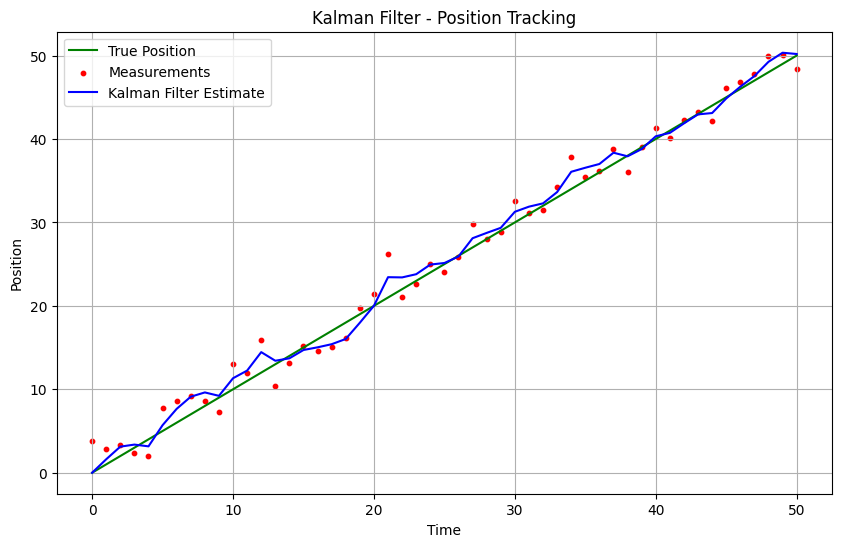

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Kalman Filter parameters
def kalman_filter(measurements, initial_state, process_var, measurement_var):
    n = len(measurements)
    x = np.zeros((n, 2))  # State [position, velocity]
    x[0] = initial_state

    P = np.eye(2)  # Initial covariance matrix
    Q = process_var * np.eye(2)  # Process noise covariance
    R = measurement_var  # Measurement noise covariance

    # State transition matrix (constant velocity model)
    F = np.array([[1, 1],
                  [0, 1]])
    H = np.array([[1, 0]])  # Measurement matrix

    for i in range(1, n):
        # Prediction step
        x_pred = F @ x[i-1]
        P_pred = F @ P @ F.T + Q

        # Measurement update step
        z = measurements[i]
        y = z - H @ x_pred  # Measurement residual

        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman Gain

        x[i] = x_pred + K @ y
        P = (np.eye(2) - K @ H) @ P_pred  # Update covariance matrix

    return x

# Simulate noisy measurements
true_position = np.linspace(0, 50, 51)
measurements = true_position + np.random.normal(0, 2, len(true_position))

# Run Kalman filter
initial_state = [0, 1]  # [position, velocity]
process_var = 0.1  # Process variance
measurement_var = 4  # Measurement variance

filtered_states = kalman_filter(measurements, initial_state, process_var, measurement_var)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(true_position, label="True Position", color="green")
plt.scatter(range(len(measurements)), measurements, label="Measurements", color="red", s=10)
plt.plot(filtered_states[:, 0], label="Kalman Filter Estimate", color="blue")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Kalman Filter - Position Tracking")
plt.legend()
plt.grid()
plt.show()
